Examen 2: Laboratorio de Analisis Numerico No Lineal

1. Se requiere aproximar la integral $\int_{-1}^{1} |x|e^{x}  dx$ utilizando diversos metodos numericos.

a)

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
def f(x):
    return np.abs(x)*np.exp(x)

dx1=0-(-1)
dx2=1-0

h_sup_1=f(-1)
h_inf_1=f(0)

h_sup_2=f(1)
h_inf_2=f(0)

suma_superior=(dx1*h_sup_1)+(dx2*h_sup_2)
suma_inferior=(dx1*h_inf_1)+(dx2*h_inf_2)

print(f"--- RESULTADOS (n=2 subintervalos) ---")
print(f"Suma Superior (Aprox): {suma_superior}")
print(f"Suma Inferior (Aprox): {suma_inferior}")

--- RESULTADOS (n=2 subintervalos) ---
Suma Superior (Aprox): 3.0861612696304874
Suma Inferior (Aprox): 0.0


Como f es continua en $[-1, 1]$ entonces es Riemann integrable, por lo que el limite de las sumas superiores y el limite de las sumas inferiores son iguales cuando n tiende a infinito.

b)

In [6]:
def punto_medio(f,a,b,n):
    h=(b-a)/n
    x_medios=np.linspace(a+h/2,b-h/2,n)
    resultado=h*np.sum(f(x_medios))
    return resultado

def trapecio(f,a,b,n):
    h=(b-a)/n
    x=np.linspace(a,b,n+1)
    y=f(x)
    resultado=(h/2)*(y[0]+2*np.sum(y[1:-1])+y[-1])
    return resultado

def simpson(f,a,b,n):
    h=(b-a)/n
    x=np.linspace(a,b,n+1)
    y=f(x)
    resultado=(h/3)*(y[0]+4*np.sum(y[1:-1:2])+2*np.sum(y[2:-2:2])+y[-1])
    return resultado
a=1
b=-1
n=10
val_medio = punto_medio(f, a, b, n)
val_trape = trapecio(f, a, b, n)
val_simps = simpson(f, a, b, n)
    
print(f"--- Aproximación de la Integral con n={n} ---")
print(f"1. Punto Medio:       {val_medio}")
print(f"2. Regla Trapecio:    {val_trape}")
print(f"3. Cavalieri-Simpson: {val_simps}")

--- Aproximación de la Integral con n=10 ---
1. Punto Medio:       -1.2585244017971946
2. Regla Trapecio:    -1.2756838821024221
3. Cavalieri-Simpson: -1.2510897629427502


c)

Valor Exacto de referencia: -1.264241118

--- Buscando N necesario para Error < 1e-7 ---
Riemann Sup: No alcanzó la precisión con 20000 nodos (Error actual: 1.55e-04)
Punto Medio: Se necesitan 2401 nodos (n=2400). Error: 9.94e-08
Trapecio: Se necesitan 3401 nodos (n=3400). Error: 9.91e-08
Simpson: Se necesitan 49 nodos (n=48). Error: 9.39e-08


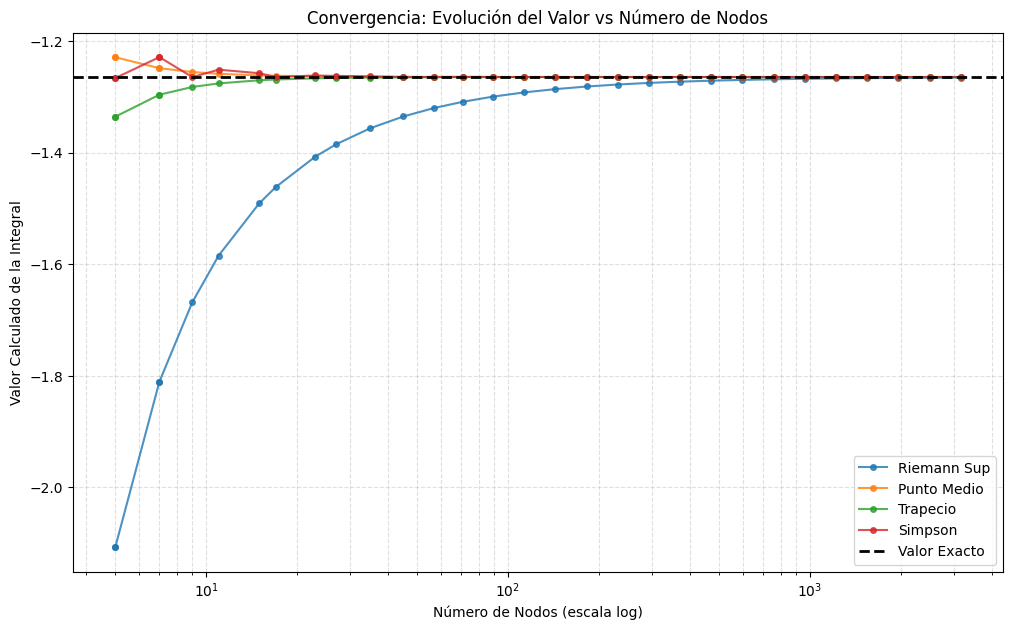

In [15]:
from scipy import integrate
valor_exacto, _ = integrate.quad(f, a, b)
print(f"Valor Exacto de referencia: {valor_exacto:.9f}\n")
def riemann_superior(n):
    x=np.linspace(a, b, n + 1)
    h=(b-a)/n
    suma = 0
    for i in range(n):
        altura = max(f(x[i]), f(x[i+1]))
        suma += altura * h
    return suma

def punto_medio(n):
    h = (b - a) / n
    x_medios = np.linspace(a + h/2, b - h/2, n)
    return h * np.sum(f(x_medios))

def trapecio(n):
    x = np.linspace(a, b, n + 1)
    h = (b - a) / n
    y = f(x)
    return (h/2) * (y[0] + 2*np.sum(y[1:-1]) + y[-1])

def simpson(n):
    if n % 2 != 0: n += 1
    x = np.linspace(a, b, n + 1)
    h = (b - a) / n
    y = f(x)
    return (h/3) * (y[0] + 4*np.sum(y[1:-1:2]) + 2*np.sum(y[2:-2:2]) + y[-1])

target_error = 1e-7
metodos = [
    ("Riemann Sup", riemann_superior),
    ("Punto Medio", punto_medio),
    ("Trapecio", trapecio),
    ("Simpson", simpson)
]

print("--- Buscando N necesario para Error < 1e-7 ---")

for nombre, funcion in metodos:
    n = 2
    encontrado = False
    
    while n < 20000:
        if nombre == "Simpson" and n % 2 != 0:
            n += 1
            
        valor = funcion(n)
        error = abs(valor - valor_exacto)
        
        if error < target_error:
            print(f"{nombre}: Se necesitan {n+1} nodos (n={n}). Error: {error:.2e}")
            encontrado = True
            break
        
        if n < 50: n += 1
        elif n < 1000: n += 10
        else: n += 100
        
    if not encontrado:
        print(f"{nombre}: No alcanzó la precisión con {n} nodos (Error actual: {error:.2e})")


n_plot = np.unique(np.logspace(0.5, 3.5, 30).astype(int))
n_plot = [n if n%2==0 else n+1 for n in n_plot]

plt.figure(figsize=(12, 7))

for nombre, funcion in metodos:
    valores = []
    ns_grafica = []
    
    for n in n_plot:
        try:
            val = funcion(n)
            valores.append(val)
            ns_grafica.append(n+1)
        except:
            pass
            
    plt.plot(ns_grafica, valores, 'o-', label=nombre, markersize=4, alpha=0.8)

plt.axhline(valor_exacto, color='black', linestyle='--', linewidth=2, label='Valor Exacto')

plt.xscale('log')
plt.xlabel('Número de Nodos (escala log)')
plt.ylabel('Valor Calculado de la Integral')
plt.title('Convergencia: Evolución del Valor vs Número de Nodos')
plt.legend()
plt.grid(True, which="both", ls="--", alpha=0.4)
plt.show()

2. Utilizar el m´etodo de Heun para resolver la EDO de primer orden:
$$y'(x) = xy(x) + x^{2}
, en (0, 1),
y(0) = 1$$
Graficar la solucion exacta y aproximada, utilizando 50, 100, 150 y 200 nodos internos
del intervalo.

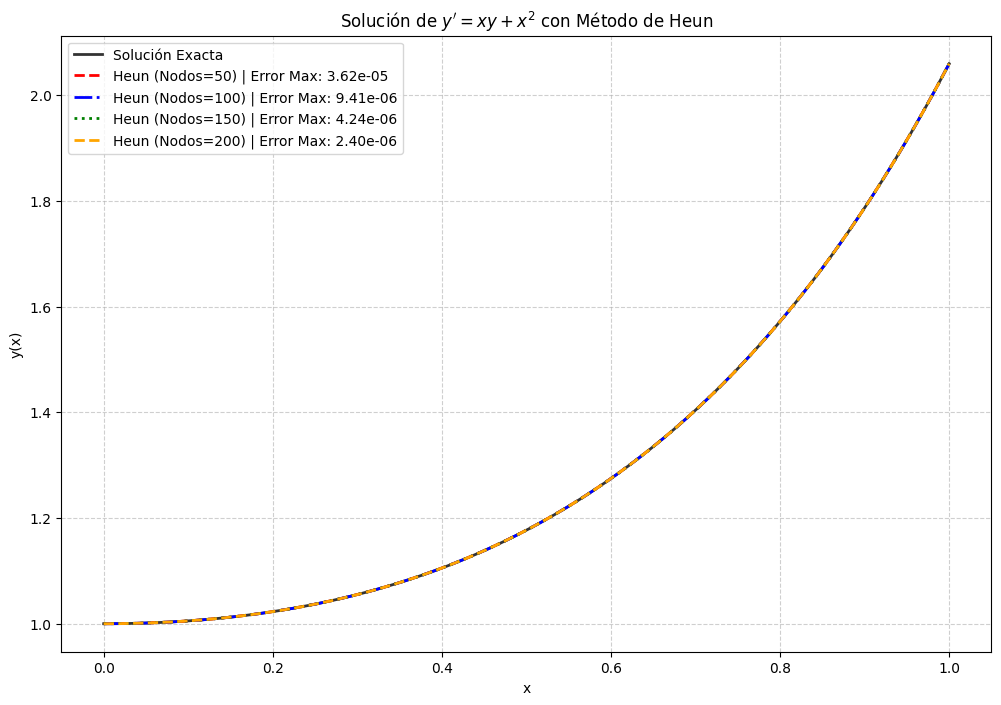

In [17]:
from scipy.special import erf
def f(x, y):
    return x*y+x**2
def solucion_exacta(x):
    return np.exp(x**2/2) * (1 + np.sqrt(np.pi/2) * erf(x/np.sqrt(2))) - x
def metodo_heun(f, x0, y0, x_final, nodos_internos):
    n_pasos = nodos_internos + 1
    h = (x_final - x0) / n_pasos
    
    x = np.linspace(x0, x_final, n_pasos + 1)
    y = np.zeros(n_pasos + 1)
    y[0] = y0
    
    for i in range(n_pasos):
        k1 = f(x[i], y[i])
        y_predict = y[i] + h * k1
        
        k2 = f(x[i] + h, y_predict)
        y[i+1] = y[i] + (h / 2) * (k1 + k2)
        
    return x, y

x0, y0 = 0, 1
x_final = 1
nodos_lista = [50, 100, 150, 200]

plt.figure(figsize=(12, 8))

x_ex = np.linspace(x0, x_final, 500)
y_ex = solucion_exacta(x_ex)
plt.plot(x_ex, y_ex, 'k-', linewidth=2, label='Solución Exacta', alpha=0.8)

colores = ['red', 'blue', 'green', 'orange']
estilos = ['--', '-.', ':', '--']

for i, nodos in enumerate(nodos_lista):
    x_num, y_num = metodo_heun(f, x0, y0, x_final, nodos)
    
    y_exacta_en_puntos = solucion_exacta(x_num)
    error_max = np.max(np.abs(y_num - y_exacta_en_puntos))
    
    plt.plot(x_num, y_num, color=colores[i], linestyle=estilos[i], 
             linewidth=2, label=f'Heun (Nodos={nodos}) | Error Max: {error_max:.2e}')

plt.title(r"Solución de $y' = xy + x^2$ con Método de Heun")
plt.xlabel("x")
plt.ylabel("y(x)")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()
